In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# [1] Exploring the data

## [1.1] Importing dataset

The first step consists in importing the dataset. Since the dataset does not include the header names, these are introduced manually to facilitate the analysis. All the information are derived from the text file which comes with the data. There is a mismatch between the number of columns in the dataset and the number of columns reported in the text file, therefore it is required to pay particular attention to understand which columns are included in the dataset (training csv file). This initial step allows also to better understand the information contained in the dataframe and helps to carry out the analysis with a better sense of the data.

In [2]:
train_filepath = './us_census_full/census_income_learn.csv'
test_filepath = './us_census_full/census_income_test.csv'
headers = './headers.csv'

# The headers csv file has been manually created and derived from a spreadsheet
# which has been used to collect all the information included in the text file

# The following step allows to create a list of names from the headers csv file
headers = pd.read_csv(headers,header=None)

list_headers = []
for index in range(headers.size):
    list_headers.append(headers[0][index])
    
# Importing the raw training and test dataframes using the headers imported above
train_raw = pd.read_csv(train_filepath, names=list_headers, index_col=False)

# Remove NA values from target
train_raw.dropna(axis=0, subset=['TARGET'], inplace=True)

# Quick visual analysis of the dataframe
pd.options.display.max_columns = None
train_raw.head(10)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR2,MIGMTR3,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,TARGET
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,89

From a first inspection of the dataset it is possible to see that some columns contains a '?' to indicate that the value is not available. The value is replaced by NaN.

In [3]:
train_raw = train_raw.replace({' ?': np.nan})
train_raw.head(10)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR2,MIGMTR3,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,TARGET
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonre

In [4]:
# Through the info() method it is possible to get some quick information about
# the column data types and the number of valid entries in each column
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199523 entries, 0 to 199522
Data columns (total 42 columns):
AAGE        199523 non-null int64
ACLSWKR     199523 non-null object
ADTIND      199523 non-null int64
ADTOCC      199523 non-null int64
AHGA        199523 non-null object
AHRSPAY     199523 non-null int64
AHSCOL      199523 non-null object
AMARITL     199523 non-null object
AMJIND      199523 non-null object
AMJOCC      199523 non-null object
ARACE       199523 non-null object
AREORGN     199523 non-null object
ASEX        199523 non-null object
AUNMEM      199523 non-null object
AUNTYPE     199523 non-null object
AWKSTAT     199523 non-null object
CAPGAIN     199523 non-null int64
CAPLOSS     199523 non-null int64
DIVVAL      199523 non-null int64
FILESTAT    199523 non-null object
GRINREG     199523 non-null object
GRINST      198815 non-null object
HHDFMX      199523 non-null object
HHDREL      199523 non-null object
MARSUPWT    199523 non-null float64
MIGMTR1     99827 no

In [5]:
# A better description of the whole dataframe is provided through the describe() method.
train_raw.describe(include='all')

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR2,MIGMTR3,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,TARGET
count,199523.000000,199523,199523.000000,199523.000000,199523,199523.000000,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523.00000,199523.000000,199523.000000,199523,199523,198815,199523,199523,199523.000000,99827,99827,99827,199523,99827,199523.000000,199523,192810,193404,196130,199523,199523.000000,199523,199523.000000,199523.000000,199523.000000,199523
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,5,10,2,3,6,8,NaN,NaN,NaN,6,6,50,38,8,NaN,9,8,9,3,3,NaN,5,42,42,42,5,NaN,3,NaN,NaN,NaN,2
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,NaN,NaN,NaN,Nonfiler,Not in universe,Not in universe,Householder,Householder,NaN,Nonmover,Nonmover,Nonmover,Not in universe under 1 year old,Not in universe,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,- 50000.
freq,NaN,100245,NaN,NaN,48407,NaN,186943,86485,100684,100684,167365,171907,103984,180459,193453,123769,NaN,NaN,NaN,75094,183750,183750,53248,75475,NaN,82538,82538,82538,101212,84054,NaN,144232,159163,160479,176989,176992,NaN,197539,NaN,NaN,NaN,187141
mean,34.494199,NaN,15.352320,11.306556,NaN,55.426908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,434.71899,37.313788,197.529533,NaN,NaN,NaN,NaN,NaN,1740.380269,NaN,NaN,NaN,NaN,NaN,1.956180,NaN,NaN,NaN,NaN,NaN,0.175438,NaN,1.514833,23.174897,94.499672,NaN
std,22.310895,NaN,18.067129,14.454204,NaN,274.896454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4697.53128,271.896428,1984.163658,NaN,NaN,NaN,NaN,NaN,993.768156,NaN,NaN,NaN,NaN,NaN,2.365126,NaN,NaN,NaN,NaN,NaN,0.553694,NaN,0.851473,24.411488,0.500001,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,37.870000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,NaN
25%,15.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1061.615000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,NaN
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1618.310000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,94.000000,NaN
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2188.610000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,NaN


The describe() function allows to examine the dataframe imported through different metrics. As it can be inferred from the two outputs obtained above, there are some potential outlier values in the data. Another observation is that after the removal of NaN values in the target column the number of observations is identical to the original dataframe.

## [1.2] Clean data and formatting the dataset (and a little bit of feature engineering)

As described in the text file provided along with the data, and from an initial visual inspection of the dataframe, it is necessary to carry out few operations on the dataframe so it can be better exploited for the analysis and following training. In addition, from conclusions drawn from the initial analysis, some features are removed for the reasons explained below.

In [6]:
# As stated in the text file, the column MARSUPWT (Instance Weight) should not be
# used in the classifier, so it is possible to drop it for the moment
train_raw.drop(['MARSUPWT'], axis=1, inplace=True)

# In the same way, it is not clear which is the meaning of the column 'YEAR', which
# contains only two distinct values with no apparent meaning
train_raw.drop(['YEAR'], axis=1, inplace=True)

# As it will be thoroughly explained in the following sections and considering
# the descriptions available, it is possible to notice that four different
# features are representing in some way the industry and occupation of each
# person in the census data. Specifically, these are ADTIND, ADTOCC, AMJIND, AMJOCC.
# For an initial analysis, besides the fact that there is no direct "translation"
# for the values contained in the features ADTIND and ADTOCC, it could be appropriate
# to drop these columns
train_raw.drop(['ADTIND'], axis=1, inplace=True)
train_raw.drop(['ADTOCC'], axis=1, inplace=True)

# It is possible to reduce the number of features creating new features which
# can be intrinsically correlated
# One example is the difference between capital gain and loss, which can provide
# the net capital of the subject
train_raw['CAPNET'] = train_raw.CAPGAIN - train_raw.CAPLOSS
train_raw.drop(['CAPGAIN'], axis=1, inplace=True)
train_raw.drop(['CAPLOSS'], axis=1, inplace=True)

# Another column which contains very detailed information about each individual
# is the 'Detailed household and family status' (HHDFMX). Since it may cause
# some issue when encoded, it is worth excluding it from this initial analysis
train_raw.drop(['HHDFMX'], axis=1, inplace=True)

After this initial feature engineering step, it is now important to check the presence of missing values or outliers in the data available.

In [7]:
missing_values = train_raw.isnull().sum()
missing_values_perc = missing_values / len(train_raw) * 100
missing_table = pd.DataFrame({'Missing values':missing_values, 'Missing values [% total]':missing_values_perc.round(2)}).sort_values(
        'Missing values [% total]', ascending=False)
missing_table.head(10)

,Missing values,Missing values [% total]
MIGMTR2,99696,49.97
MIGMTR3,99696,49.97
MIGSUN,99696,49.97
MIGMTR1,99696,49.97
PEFNTVTY,6713,3.36
PEMNTVTY,6119,3.07
PENATVTY,3393,1.70
GRINST,708,0.35
PRCITSHP,0,0.00
SEOTR,0,0.00


The four features missing most of the entries lack almost half the information. Following an analysis of their meaning and considering the fact that filtering the missing values for these features would removed half of the data, it has been decided to remove these features from the analysis. Additionally, the rest of the missing values are removed.

In [8]:
cols_to_be_removed = ['MIGMTR1','MIGMTR2','MIGMTR3','MIGSUN']
train_raw = train_raw.drop(cols_to_be_removed, axis=1)

# The missing values for the remaining columns are removed for the moment
# Imputing the missing values could be another viable way to try
train_na = train_raw.dropna()

In [9]:
data_removed = train_raw.shape[0] - train_na.shape[0]
print('[+] Percentage of data removed for missing values = {:.2f}%'.format(data_removed / train_raw.shape[0] * 100))

[+] Percentage of data removed for missing values = 4.49%


In [10]:
train_na.describe(include='all')

,AAGE,ACLSWKR,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,DIVVAL,FILESTAT,GRINREG,GRINST,HHDREL,MIGSAME,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,TARGET,CAPNET
count,190561.000000,190561,190561,190561.000000,190561,190561,190561,190561,190561,190561,190561,190561,190561,190561,190561.000000,190561,190561,190561,190561,190561,190561.000000,190561,190561,190561,190561,190561,190561.000000,190561,190561.000000,190561.000000,190561,190561.000000
unique,NaN,9,17,NaN,3,7,24,15,5,10,2,3,6,8,NaN,6,6,50,8,3,NaN,5,42,42,42,5,NaN,3,NaN,NaN,2,NaN
top,NaN,Not in universe,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,NaN,Nonfiler,Not in universe,Not in universe,Householder,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,- 50000.,NaN
freq,NaN,95312,46227,NaN,178486,83367,95723,95723,160156,164313,99286,172205,184774,118393,NaN,72079,176054,176054,71367,96903,NaN,136995,157623,158488,171878,171880,NaN,188669,NaN,NaN,178904,NaN
mean,34.098299,NaN,NaN,55.968866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.466334,NaN,NaN,NaN,NaN,NaN,1.967543,NaN,NaN,NaN,NaN,NaN,0.177439,NaN,1.507958,23.283285,NaN,386.393034
std,22.101273,NaN,NaN,274.805759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.121814,NaN,NaN,NaN,NaN,NaN,2.368416,NaN,NaN,NaN,NaN,NaN,0.556624,NaN,0.855601,24.417661,NaN,4622.672368
min,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,-4608.000000
25%,15.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,NaN,0.000000
50%,33.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,NaN,0.000000
75%,49.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,NaN,0.000000


Now that the missing values have been removed, it is easier to fix another issue present in the categorical features. Specifically, the different strings contain a white space at the beginning. For better handling the categorical columns content, it is worth removing this white space through the step below.

In [11]:
# Extract categorical features
object_cols = [col for col in train_na.columns if train_na[col].dtype == "object"]

for col in object_cols:
    train_na[col] = [c.lstrip() for c in train_na[col]]

/Users/federicocipriani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
# The feature 'Education' (AHGA) could be correlated to the targeted response
# Due to the high number of features (17 distinct values, it is worth reducing it
# by grouping the various school grades under an unique label
# This operation brings down the number of distint values to 10
basic_cols = ['Less than 1st grade','1st 2nd 3rd or 4th grade','5th or 6th grade',
              '7th and 8th grade','9th grade','10th grade','11th grade','12th grade no diploma']

for col in basic_cols:
    train_na['AHGA'] = np.where(train_na['AHGA'] == col, 'School', train_na['AHGA'])

pd.options.mode.chained_assignment = None

# Fix the whole 'Education' column
train_na['AHGA'] = np.where(train_na['AHGA'] == 'Bachelors degree(BA AB BS)', 'Bachelors degree', train_na['AHGA'])
train_na['AHGA'] = np.where(train_na['AHGA'] == 'Masters degree(MA MS MEng MEd MSW MBA)', 'Masters degree', train_na['AHGA'])
train_na['AHGA'] = np.where(train_na['AHGA'] == 'Prof school degree (MD DDS DVM LLB JD)', 'Prof school degree', train_na['AHGA'])
train_na['AHGA'] = np.where(train_na['AHGA'] == 'Doctorate degree(PhD EdD)', 'Doctorate degree', train_na['AHGA'])

train_na['AHGA'].unique()

/Users/federicocipriani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array(['High school graduate', 'Some college but no degree', 'School',
       'Children', 'Bachelors degree', 'Masters degree',
       'Associates degree-academic program',
       'Associates degree-occup /vocational', 'Prof school degree',
       'Doctorate degree'], dtype=object)

## [1.3] Check for outlier

As mentioned above, another important step consists in cleaning the dataframe from potential outliers (as spotted in the output of the describe() function above).

In [13]:
train_outliers = train_na

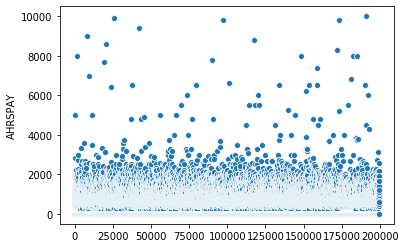

In [14]:
# The first variable to show some outlier values is the wage/hour variable
sns.scatterplot(x=train_outliers.index, y='AHRSPAY', data=train_outliers)

# After examining the scatter plot it is possible to remove 
train_outliers = train_outliers[train_outliers['AHRSPAY'] != 9999]

Few people make more than 4000$ per hour. The max value for the wage/hour (AHRSPAY) from the describe() output is 9999, which may sound like an outlier. The associated observations are removed.

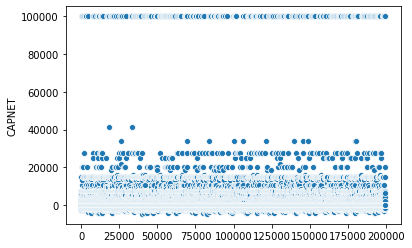

In [15]:
# Another variable to check is the capital gains
sns.scatterplot(x=train_outliers.index, y='CAPNET', data=train_outliers)

# After examining the scatter plot it is possible to remove
# points with values of CAPNET equal to 99999
train_outliers = train_outliers[train_outliers['CAPNET'] != 99999]

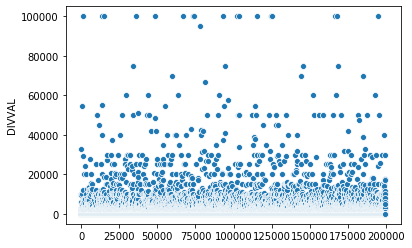

In [16]:
# Another variable to check is the dividends from stocks
sns.scatterplot(x=train_outliers.index,y='DIVVAL', data=train_outliers)

# After examining the scatter plot it is possible to remove
# points with values of dividends from stocks greater than 80000
train_outliers = train_outliers[train_outliers['DIVVAL'] < 80000]

In [17]:
data_removed = train_na.shape[0] - train_outliers.shape[0]
print('[+] Percentage of data removed for outliers = {:.2f}%'.format(data_removed / train_na.shape[0] * 100))

[+] Percentage of data removed for outliers = 0.20%


In [18]:
train_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190184 entries, 0 to 199521
Data columns (total 32 columns):
AAGE        190184 non-null int64
ACLSWKR     190184 non-null object
AHGA        190184 non-null object
AHRSPAY     190184 non-null int64
AHSCOL      190184 non-null object
AMARITL     190184 non-null object
AMJIND      190184 non-null object
AMJOCC      190184 non-null object
ARACE       190184 non-null object
AREORGN     190184 non-null object
ASEX        190184 non-null object
AUNMEM      190184 non-null object
AUNTYPE     190184 non-null object
AWKSTAT     190184 non-null object
DIVVAL      190184 non-null int64
FILESTAT    190184 non-null object
GRINREG     190184 non-null object
GRINST      190184 non-null object
HHDREL      190184 non-null object
MIGSAME     190184 non-null object
NOEMP       190184 non-null int64
PARENT      190184 non-null object
PEFNTVTY    190184 non-null object
PEMNTVTY    190184 non-null object
PENATVTY    190184 non-null object
PRCITSHP    190184

## [1.4] Analysing the target

In [19]:
# Before proceeding with the features label/one-hot encodings, it is
# worth encoding the target column to facilitate the following analysis
train = train_outliers

train = train.assign(y=(train['TARGET'] == '50000+.').astype(int))
train.drop(['TARGET'], axis=1, inplace=True)

# Quick re-analysis of the target values post outlier filtering
less_than_50K = len(train[train['y'] == 0])
more_than_50K = len(train[train['y'] == 1])
perc_less = less_than_50K / train.shape[0] * 100
perc_more = more_than_50K / train.shape[0] * 100

print("Percentage of people earning MORE than 50K$ = {:.2f}%".format(perc_more))
print("Percentage of people earning LESS than 50K$ = {:.2f}%".format(perc_less))

Percentage of people earning MORE than 50K$ = 5.95%
Percentage of people earning LESS than 50K$ = 94.05%


The result shows that there is an imbalance in the target values and this may cause some problems in the derivation of the classifier. Though, a thorough analysis should be carried out, because the problem may not be the imbalance per se, but the possibility that there may not be enough patterns describing the minority class.

## [1.5] Scaling numerical features

It is not usually required to scale features for logistic regression or random forest classifiers, but it is always good practice to do so. For the current problem, a simple scaling based on the range of values for each numerical feature will be used. First, it is worth exploring a little bit more the insights provided by the numerical features.

In [20]:
# Check characteristics of the numerical features of the dataframe
num_cols = train.select_dtypes('number').columns
print(num_cols)

Index(['AAGE', 'AHRSPAY', 'DIVVAL', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK',
       'CAPNET', 'y'],
      dtype='object')


In [21]:
# As it can be inferred from the document which comes along with the data
# the features SEOTR and VETYN are technically categorical features which
# come already encoded (0,1,2 levels)
# To draw some initial insight, it is possible to remove them from the list
num_cols_valid = ['AAGE','AHRSPAY','CAPNET','DIVVAL','NOEMP','WKSWORK','y']
num_df = train[num_cols_valid]

num_df.groupby('y').mean()

,AAGE,AHRSPAY,CAPNET,DIVVAL,NOEMP,WKSWORK
y,,,,,,
0,33.316997,54.222427,91.319272,103.488396,1.833358,21.658023
1,46.001767,83.977829,1889.774843,1278.006713,4.045049,48.188676


The numerical features show that a person who earns more than 50K$ per year is on average:
- older
- is paid more on an hourly basis
- works on average more than double the time

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the numerical features
num_cols_valid = ['AAGE','AHRSPAY','CAPNET','DIVVAL','NOEMP','WKSWORK']
num_df = train[num_cols_valid]
scaler.fit(num_df)

# Transform both the training and testing data
num_scaled = scaler.transform(num_df)
num_df_scaled = pd.DataFrame(num_scaled, columns=num_cols_valid)

# Extract the remaining columns (categorical features)
cat_df = train.drop(num_cols_valid, axis=1)
# Reset the index to aid the concatenation of the two dataframes
cat_df = cat_df.reset_index(drop=True)

train_scaled = num_df_scaled.join(cat_df)

train_scaled.describe(include='all')

,AAGE,AHRSPAY,CAPNET,DIVVAL,NOEMP,WKSWORK,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,FILESTAT,GRINREG,GRINST,HHDREL,MIGSAME,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,y
count,190184.000000,190184.000000,190184.000000,190184.000000,190184.000000,190184.000000,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184.000000,190184,190184.000000,190184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,9,10,3,7,24,15,5,10,2,3,6,8,6,6,50,8,3,5,42,42,42,5,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Not in universe under 1 year old,Not in universe,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,95272,46183,178110,83344,95683,95683,159808,163958,99211,171877,184399,118221,72079,175693,175693,71002,96698,136618,157297,158161,171527,171529,NaN,188295,NaN,NaN
mean,0.378579,0.005647,0.104673,0.002312,0.327502,0.446871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177249,NaN,1.506998,0.059527
std,0.245666,0.027635,0.035682,0.020798,0.394698,0.469446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.556456,NaN,0.856168,0.236608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,0.166667,0.000000,0.100353,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000
50%,0.366667,0.000000,0.100353,0.000000,0.166667,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000
75%,0.544444,0.000000,0.100353,0.000000,0.666667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000


## [1.6] Exploratory analysis

The aim of this section is to examine a series of outputs and plots and determine which features show relationships/patterns and anomalies that can be helpful in determining which are the best features for the classifier.

In [23]:
train = train_scaled

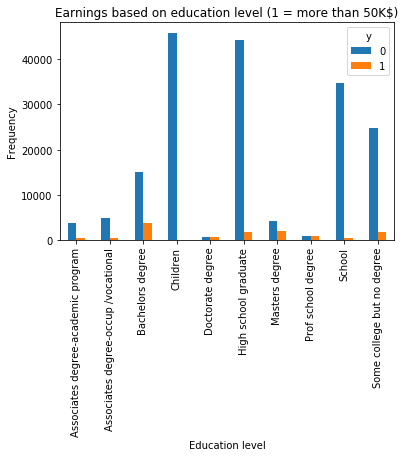

In [24]:
pd.crosstab(train['AHGA'],train['y']).plot(kind='bar')
plt.title('Earnings based on education level (1 = more than 50K$)')
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.show()

The salary amount depends on the education level and therefore this can be considered as a good predictor of the outcome variable.

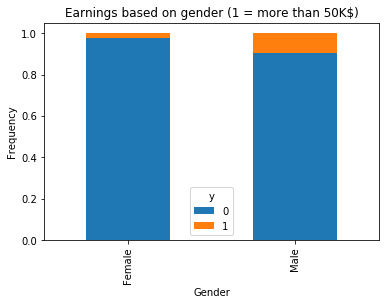

In [25]:
table = pd.crosstab(train['ASEX'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on gender (1 = more than 50K$)')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Gender is not a very strong predictor. Nevertheless, it is worth considering this feature in the classifier since it is known there may be a gender wage gap in some sectors.

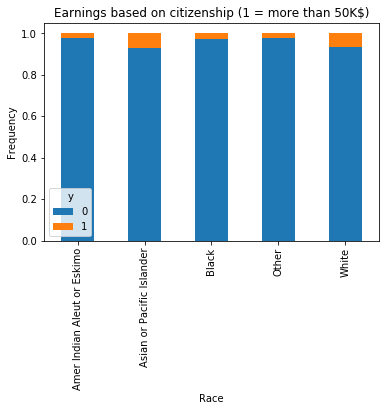

In [26]:
table = pd.crosstab(train['ARACE'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on citizenship (1 = more than 50K$)')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

Race is a weak predictor, but it would be worth including it in the classifier.

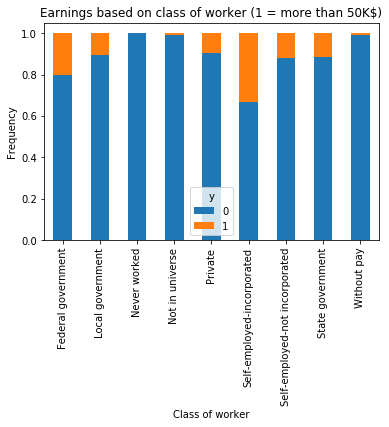

In [27]:
table = pd.crosstab(train['ACLSWKR'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on class of worker (1 = more than 50K$)')
plt.xlabel('Class of worker')
plt.ylabel('Frequency')
plt.show()

Class of worker is an excellent predictor and it is very important to include it in the classifier. In order to reduce the cardinality of this variable it is worth grouping the labels 'Never worked','Not in universe','Without pay' under an unique label 'No wage'.

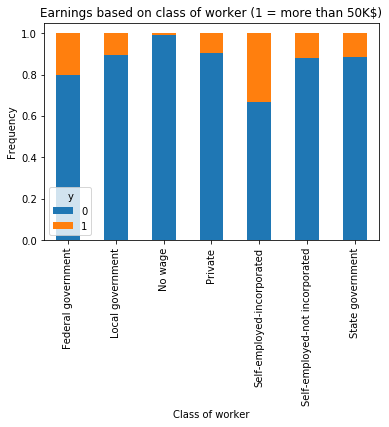

In [28]:
basic_cols = ['Never worked', 'Without pay','Not in universe']

for col in basic_cols:
    train['ACLSWKR'] = np.where(train['ACLSWKR'] == col, 'No wage', train['ACLSWKR'])
    
table = pd.crosstab(train['ACLSWKR'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on class of worker (1 = more than 50K$)')
plt.xlabel('Class of worker')
plt.ylabel('Frequency')
plt.show()

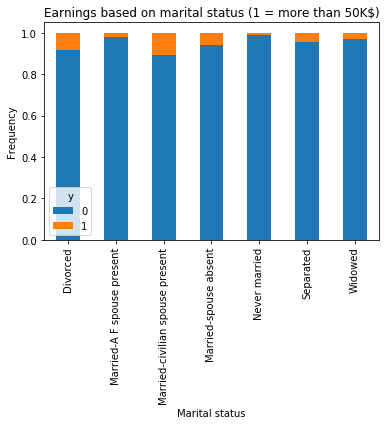

In [29]:
table = pd.crosstab(train['AMARITL'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on marital status (1 = more than 50K$)')
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.show()

Marital status is a pretty good predictor and it can be included in the classifier.

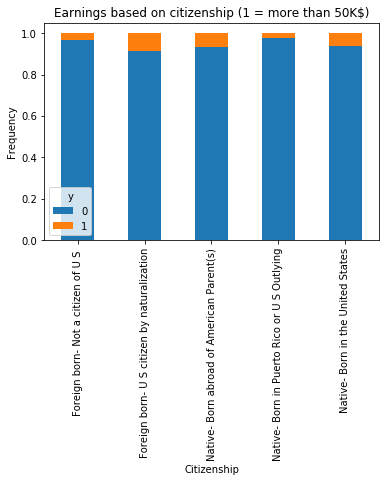

In [30]:
table = pd.crosstab(train['PRCITSHP'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on citizenship (1 = more than 50K$)')
plt.xlabel('Citizenship')
plt.ylabel('Frequency')
plt.show()

Citizenship is a weak predictor, but it may be worth to keep it for an initial assessment of the classifier.

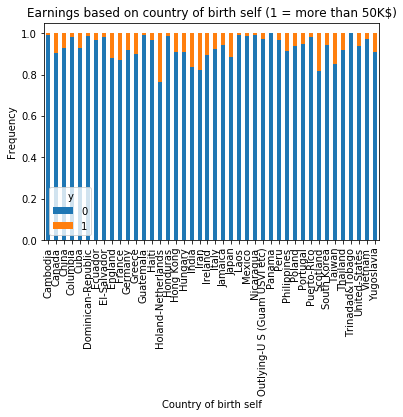

In [31]:
table = pd.crosstab(train['PENATVTY'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on country of birth self (1 = more than 50K$)')
plt.xlabel('Country of birth self')
plt.ylabel('Frequency')
plt.show()

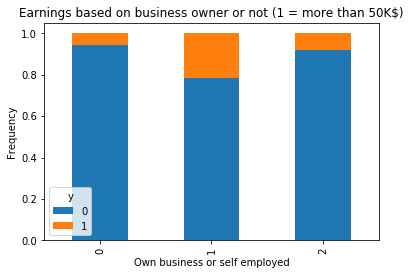

In [32]:
table = pd.crosstab(train['SEOTR'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on business owner or not (1 = more than 50K$)')
plt.xlabel('Own business or self employed')
plt.ylabel('Frequency')
plt.show()

Thorough information for this column are not present. Though, deriving from what has been seen for the other features, '0' may mean 'Not in universe' (not a business owner), '1' may mean 'Own a business' and '2' may mean 'Self employed'. There is some variability in the target for the three labels, so it may be worth considering this predictor in the first round of training.

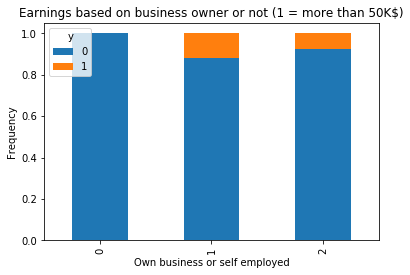

In [33]:
table = pd.crosstab(train['VETYN'],train['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Earnings based on business owner or not (1 = more than 50K$)')
plt.xlabel('Own business or self employed')
plt.ylabel('Frequency')
plt.show()

## [1.7] Extracting the final dataframe and target

In [34]:
y = train['y']
X = train.drop(['y'],axis=1)

In [35]:
X.describe(include='all')

,AAGE,AHRSPAY,CAPNET,DIVVAL,NOEMP,WKSWORK,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,FILESTAT,GRINREG,GRINST,HHDREL,MIGSAME,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN
count,190184.000000,190184.000000,190184.000000,190184.000000,190184.000000,190184.000000,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184,190184.000000,190184,190184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,10,3,7,24,15,5,10,2,3,6,8,6,6,50,8,3,5,42,42,42,5,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,No wage,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Not in universe under 1 year old,Not in universe,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,95841,46183,178110,83344,95683,95683,159808,163958,99211,171877,184399,118221,72079,175693,175693,71002,96698,136618,157297,158161,171527,171529,NaN,188295,NaN
mean,0.378579,0.005647,0.104673,0.002312,0.327502,0.446871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177249,NaN,1.506998
std,0.245666,0.027635,0.035682,0.020798,0.394698,0.469446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.556456,NaN,0.856168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,0.166667,0.000000,0.100353,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000
50%,0.366667,0.000000,0.100353,0.000000,0.166667,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000
75%,0.544444,0.000000,0.100353,0.000000,0.666667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000


## [1.8] One-Hot Encoding

Most of the features in the dataframe are represented by categorical data and therefore they require some form of encoding before being used in a model.

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Extract categorical features and split the dataset
object_cols = [col for col in X.columns if X[col].dtype == "object"]
cat_df = X[object_cols]
num_df = X.drop(object_cols, axis=1)

# Initialise the One Hot Encoder
oh_enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

# Fit the encoder and apply it to all the categorical features
cat_enc = pd.DataFrame(oh_enc.fit_transform(cat_df))
cat_enc.index = cat_df.index
cat_enc.columns = oh_enc.get_feature_names(input_features=object_cols)

# Re-create the original dataset (X) with the encoded features
X_final = pd.concat([num_df, cat_enc], axis=1)
X_final.head()

,AAGE,AHRSPAY,CAPNET,DIVVAL,NOEMP,WKSWORK,SEOTR,VETYN,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_No wage,ACLSWKR_Private,ACLSWKR_Self-employed-incorporated,ACLSWKR_Self-employed-not incorporated,ACLSWKR_State government,AHGA_Associates degree-academic program,AHGA_Associates degree-occup /vocational,AHGA_Bachelors degree,AHGA_Children,AHGA_Doctorate degree,AHGA_High school graduate,AHGA_Masters degree,AHGA_Prof school degree,AHGA_School,AHGA_Some college but no degree,AHSCOL_College or university,AHSCOL_High school,AHSCOL_Not in universe,AMARITL_Divorced,AMARITL_Married-A F spouse present,AMARITL_Married-civilian spouse present,AMARITL_Married-spouse absent,AMARITL_Never married,AMARITL_Separated,AMARITL_Widowed,AMJIND_Agriculture,AMJIND_Armed Forces,AMJIND_Business and repair services,AMJIND_Communications,AMJIND_Construction,AMJIND_Education,AMJIND_Entertainment,AMJIND_Finance insurance and real estate,AMJIND_Forestry and fisheries,AMJIND_Hospital services,AMJIND_Manufacturing-durable goods,AMJIND_Manufacturing-nondurable goods,AMJIND_Medical except hospital,AMJIND_Mining,AMJIND_Not in universe or children,AMJIND_Other professional services,AMJIND_Personal services except private HH,AMJIND_Private household services,AMJIND_Public administration,AMJIND_Retail trade,AMJIND_Social services,AMJIND_Transportation,AMJIND_Utilities and sanitary services,AMJIND_Wholesale trade,AMJOCC_Adm support including clerical,AMJOCC_Armed Forces,AMJOCC_Executive admin and managerial,AMJOCC_Farming forestry and fishing,AMJOCC_Handlers equip cleaners etc,AMJOCC_Machine operators assmblrs & inspctrs,AMJOCC_Not in universe,AMJOCC_Other service,AMJOCC_Precision production craft & repair,AMJOCC_Private household services,AMJOCC_Professional specialty,AMJOCC_Protective services,AMJOCC_Sales,AMJOCC_Technicians and related support,AMJOCC_Transportation and material moving,ARACE_Amer Indian Aleut or Eskimo,ARACE_Asian or Pacific Islander,ARACE_Black,ARACE_Other,ARACE_White,AREORGN_All other,AREORGN_Central or South American,AREORGN_Chicano,AREORGN_Cuban,AREORGN_Do not know,AREORGN_Mexican (Mexicano),AREORGN_Mexican-American,AREORGN_NA,AREORGN_Other Spanish,AREORGN_Puerto Rican,ASEX_Female,ASEX_Male,AUNMEM_No,AUNMEM_Not in universe,AUNMEM_Yes,AUNTYPE_Job leaver,AUNTYPE_Job loser - on layoff,AUNTYPE_New entrant,AUNTYPE_Not in universe,AUNTYPE_Other job loser,AUNTYPE_Re-entrant,AWKSTAT_Children or Armed Forces,AWKSTAT_Full-time schedules,AWKSTAT_Not in labor force,AWKSTAT_PT for econ reasons usually FT,AWKSTAT_PT for econ reasons usually PT,AWKSTAT_PT for non-econ reasons usually FT,AWKSTAT_Unemployed full-time,AWKSTAT_Unemployed part- time,FILESTAT_Head of household,FILESTAT_Joint both 65+,FILESTAT_Joint both under 65,FILESTAT_Joint one under 65 & one 65+,FILESTAT_Nonfiler,FILESTAT_Single,GRINREG_Abroad,GRINREG_Midwest,GRINREG_Northeast,GRINREG_Not in universe,GRINREG_South,GRINREG_West,GRINST_Abroad,GRINST_Alabama,GRINST_Alaska,GRINST_Arizona,GRINST_Arkansas,GRINST_California,GRINST_Colorado,GRINST_Connecticut,GRINST_Delaware,GRINST_District of Columbia,GRINST_Florida,GRINST_Georgia,GRINST_Idaho,GRINST_Illinois,GRINST_Indiana,GRINST_Iowa,GRINST_Kansas,GRINST_Kentucky,GRINST_Louisiana,GRINST_Maine,GRINST_Maryland,GRINST_Massachusetts,GRINST_Michigan,GRINST_Minnesota,GRINST_Mississippi,GRINST_Missouri,GRINST_Montana,GRINST_Nebraska,GRINST_Nevada,GRINST_New Hampshire,GRINST_New Jersey,GRINST_New Mexico,GRINST_New York,GRINST_North Carolina,GRINST_North Dakota,GRINST_Not in universe,GRINST_Ohio,GRINST_Oklahoma,GRINST_Oregon,GRINST_Pennsylvania,GRINST_South Carolina,GRINST_South Dakota,GRINST_Tennessee,GRINST_Texas,GRINST_Utah,GRINST_Vermont,GRINST_Virginia,GRINST_West Virginia,GRINST_Wisconsin,GRINST_Wyoming,HHDREL_Child 18 or older,HHDREL_Child under 18 ever married,HHDREL_Child under 18 never married,HHDREL_Group Quarters- Secondary individual,HHDREL_Householder,HHDREL_Nonrelative of householder,HHDREL_Other relative of householder,HHDREL_S

# [2] Model training

The dataframe is ready to be used to train a classifier. Specifically, the initial operations carried out on the data included:
- removing columns which provide almost the same information as other columns, along with columns which apparently do not come with a thorough explanation
- dropping columns  containing around or more than 50% of missing values
- removing entries containing outlier values for some features
- scaling the numerical features (extra step which is not always required for the following steps)
- one-hot encode the categorical features

For the current job, a logistic regression classifier and a Random Forest classifier will be tested. It has to be highlighted that the current dataset is highly imbalanced (as shown above, with 94% of the data being labelled as 'below 50000$') and techniques aimed to remove this issue may be tested. For this initial assessment it is worth investigating the effect of the high imbalance on the classifiers accuracy.

## [2.1] Logistic Regression

The first step consists in splitting the training dataset into a training set and a validation set. Usually using 20% of the data available for validation purposes is considered appropriate.

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X_final, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=42)

At this point it is possible to train the model and check the accuracy of the Logistic Regression classifier.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create model and training
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Exploiting the model on validation set
y_pred = lr.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, y_pred)

print('-----------------------------------------------------------------')
print('Accuracy of the Logistic Regression Classifier = {:.2f}%'.format(accuracy * 100))
print('-----------------------------------------------------------------')

/Users/federicocipriani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-----------------------------------------------------------------
Accuracy of the Logistic Regression Classifier = 95.25%
-----------------------------------------------------------------


The accuracy of the classifier just created is 95.25%. Though, it has to be noted that even through a naive model which predicts all the outcomes as "below 50000$", the accuracy would have been almost equal to 94%, as seen above when the target values distribution has been analysed. A better understanding on how the classifier is behaving can be obtained looking at the Confusion Matrix, a useful tool when a classification problem is under analysis.

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_valid, y_pred)

print(confusion_matrix)

[[35480   340]
 [ 1468   749]]


From simple calculations based on the Confusion Matrix it is possible to derive:
- Recall (or sensitivity) = 0.688 [percentage of samples correctly labelled as positive 'more than 50000$']

- Precision = 0.338 [percentage of correct positive predictions]

- Specificity = 0.960 [percentage of samples correctly labelled as negative 'less than 50000$']



These results show that the classifier is correctly labelling the majority of the negative entries, i.e. less than 50000 USD, but it has some issues in labelling the positive entries, i.e. more than 50000 USD. Indeed, in terms of precision, the model is labelling as positive more entries than the number of actual positive entries. On the other side, looking at the value of recall (sensitivity), the model is not able to correctly classify as positive around 33% of the entries.

Another way to assess and compare the Logistic Regression classifier against the Random Forest model is through the Receiver Operator Characteristic (ROC) curve and the associated Area Under the Curve (AUC).

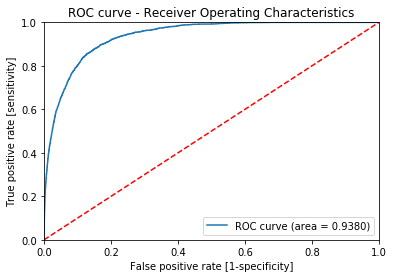

In [42]:
y_pred_proba = lr.predict_proba(X_valid)[:,1]

[lr_fpr, lr_tpr, lr_thresholds] = metrics.roc_curve(y_valid, y_pred_proba)

# Calculate the area under the ROC curve
lr_roc_auc = metrics.auc(lr_fpr,lr_tpr)

plt.figure()
plt.plot(lr_fpr, lr_tpr, label='ROC curve (area = {:.4f})'.format(lr_roc_auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate [1-specificity]')
plt.ylabel('True positive rate [sensitivity]')
plt.title('ROC curve - Receiver Operating Characteristics')
plt.legend()
plt.show()

It is possible to determine which are the most important features considered by the Logistic Regression classifier looking at the magnitude of the different coefficients. This helps in understanding which are the features which are better related to the classification problem under analysis.

In [43]:
lr_fi = lr.coef_[0]
lr_fi_df = pd.DataFrame({'feature': X_train.columns,'feature_importance': lr_fi.round(3)}).sort_values('feature_importance', ascending = False).reset_index(drop = True)

# Display the first 40 most important features
lr_fi_df.head(40)

,feature,feature_importance
0,DIVVAL,11.086
1,CAPNET,6.260
2,AAGE,2.843
3,WKSWORK,1.942
4,AHGA_Doctorate degree,1.628
5,AHGA_Prof school degree,1.517
6,PENATVTY_Scotland,1.302
7,NOEMP,1.010
8,AMJOCC_Executive admin and managerial,0.825
9,PENATVTY_El-Salvador,0.822


The first four places of the ranking are reserved by four numerical features, with 'Dividends from stocks (DIVVAL)' covering the top spot. This is followed by the net capital (which was a features created by the difference between the capital gain and the capital loss), the age of the individual and the weeks worked during a year. Between the most recurring features, it is possible to find that the country of birth of each individual, along with those of his/her mother and father, plays a role in determining if an individual earns more or less than 50000$. Though, this is what the classifier tells us, but from a logical point of view it is difficult to imagine how these features can be correlated with the yearly earnings of an individual. These results can be analysed more thoroughly and this kind of features may be discarded.

## [2.2] Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Create the a Random Forest Classifier with 100 decision trees
# Keep the rest of hyperparameters to default
# 100 has been selected as a default to keep the computational expenses low
# As it has been attempted, increasing the number of trees to 1000 does not
# increase the accuracy, though it slightly increases the precision
rf = RandomForestClassifier(n_estimators=100, random_state=21)

# Train the model using the training set
rf.fit(X_train,y_train)

y_pred = rf.predict(X_valid)
accuracy = rf.score(X_valid, y_valid)

print('-----------------------------------------------------------------')
print('Accuracy for Random Forest classifier on validation set = {:.2f}%'.format(accuracy * 100))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
Accuracy for Random Forest classifier on validation set = 95.41%
-----------------------------------------------------------------


Through a direct comparison of the classifiers' accuracies it is possible to state that the two models are pretty equivalent, since the RF classifier has a better accuracy by just 0.16%. As it has been done for the previous model, it is possible to get the Confusion Matrix for the Random Forest classifier in order to understand how the model is behaving.

In [87]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_valid, y_pred)
print(cm_rf)

[[35473   347]
 [ 1399   818]]


From the calculations based on the Confusion Matrix it is possible to derive, for the Random Forest classifier:
- Recall (or sensitivity) = 0.702 [percentage of samples correctly labelled as positive 'more than 50000$']

- Precision = 0.369 [percentage of correct positive predictions]

- Specificity = 0.962 [percentage of samples correctly labelled as negative 'less than 50000$']

There are very tiny improvements in these three characteristics. Though, as it can be checked by direct comparison of the numbers in the two confusion matrices available, the Random Forest classifier allows to better label the entries for people earning more than 50000$, in fact increasing both precision and recall. Though, as explained above, these results still are not good to affirm that the model is working correctly.

As previously done, it is possible to understand which are the most important features which have the highest impact in determing if a person earns more or less than 50000$.
One of the main features of a Random Forest model is its tendency to emphasise features selection through the weighing of some features more than other. This information is contained in the attribute "feature_importance_" of the Random Forest model. Though, particular attention has to be paid when the extracted information from this attribute are used to provide insights on the nature of the problem under analysis. This is due to the fact that feature_importances_ content may be biased towards both numerical features and categorical features characterised by high cardinality. Though, for an initial assessment, it is worth checking the results contained in this model attribute. 

In [46]:
rf_fi = rf.feature_importances_

rf_fi_df = pd.DataFrame({'feature': X_train.columns,
                   'feature_importance': rf_fi.round(3)}).sort_values('feature_importance', ascending = False).reset_index(drop = True)

# Display the first 40 most important features
rf_fi_df.head(40)

,feature,feature_importance
0,AAGE,0.118
1,DIVVAL,0.086
2,CAPNET,0.080
3,NOEMP,0.049
4,WKSWORK,0.035
5,AMJOCC_Executive admin and managerial,0.024
6,AHGA_Bachelors degree,0.018
7,ASEX_Female,0.018
8,AHGA_Masters degree,0.018
9,ASEX_Male,0.018


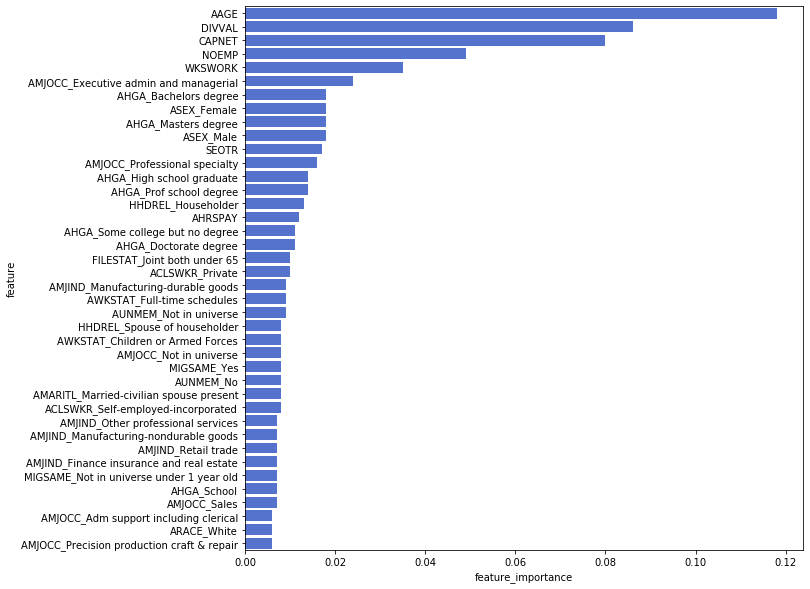

In [47]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.barplot(x = 'feature_importance', y = 'feature', data = rf_fi_df[0:40], orient = 'h', color = 'royalblue')

The histogram above shows that the numerical features (except AHRSPAY, wage per hour, ranked 15th) are the most important in the identification of a person who earns more or less than 50000$ per year. Besides few other important features, it can be noted that the importance of the remaining features is pretty low and comparable. 

Another way which allows to automatically select the most important features is by letting the model spot which are the most significant features through the sklearn method SelectFromModel.

In [48]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=21))
sel.fit(X_train, y_train)

sel_feat = X_train.columns[sel.get_support()]
print('Number of features selected = {} out of {}'.format(len(sel_feat), len(X_train.columns)))
print(sel_feat)

Number of features selected = 68 out of 320
Index(['AAGE', 'AHRSPAY', 'CAPNET', 'DIVVAL', 'NOEMP', 'WKSWORK', 'SEOTR',
       'ACLSWKR_Federal government', 'ACLSWKR_Local government',
       'ACLSWKR_No wage', 'ACLSWKR_Private',
       'ACLSWKR_Self-employed-incorporated',
       'ACLSWKR_Self-employed-not incorporated', 'ACLSWKR_State government',
       'AHGA_Associates degree-academic program',
       'AHGA_Associates degree-occup /vocational', 'AHGA_Bachelors degree',
       'AHGA_Doctorate degree', 'AHGA_High school graduate',
       'AHGA_Masters degree', 'AHGA_Prof school degree', 'AHGA_School',
       'AHGA_Some college but no degree', 'AMARITL_Divorced',
       'AMARITL_Married-civilian spouse present', 'AMARITL_Never married',
       'AMJIND_Business and repair services', 'AMJIND_Communications',
       'AMJIND_Construction', 'AMJIND_Education',
       'AMJIND_Finance insurance and real estate', 'AMJIND_Hospital services',
       'AMJIND_Manufacturing-durable goods',
       '

In [49]:
# At this point it is possible to try to train the Random Forest classifier
# using only the most important features
rf_sel = RandomForestClassifier(n_estimators=100, random_state=21)

X_train_sel = X_train[sel_feat]
X_valid_sel = X_valid[sel_feat]

# Train the model using the training set
rf_sel.fit(X_train_sel,y_train)

y_pred = rf_sel.predict(X_valid_sel)
accuracy = rf_sel.score(X_valid_sel, y_valid)

print('-----------------------------------------------------------------')
print('Accuracy for Random Forest classifier on validation set (with selected features) = {:.2f}%'.format(accuracy * 100))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
Accuracy for Random Forest classifier on validation set (with selected features) = 95.53%
-----------------------------------------------------------------


The improvement gained by training the model using only the most important features selected by the SelectFromModel method is only 0.1%. Though, different other features combinations have been tested. For example, using only the numerical features leads to a reduction of the accuracy compared to the combination which considers only the selected features by the sklearn method.

As it can be inferred by the results obtained above, the most important features which characterise people who earn more or less than 50000$ are:
- all the numerical features (age of a person, hourly wage, number of weeks worked in a year,...)
- class of the worker
- education level acquired
- industry and occupation
- gender

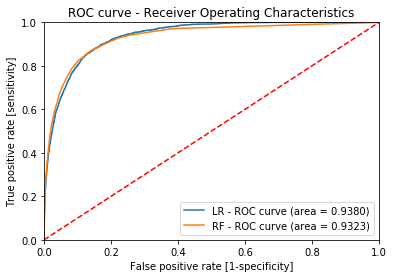

In [50]:
y_pred_proba = rf.predict_proba(X_valid)[:,1]

[rf_fpr, rf_tpr, rf_thresholds] = metrics.roc_curve(y_valid, y_pred_proba)

# Calculate the area under the ROC curve
rf_roc_auc = metrics.auc(rf_fpr,rf_tpr)

plt.figure()
plt.plot(lr_fpr, lr_tpr, label='LR - ROC curve (area = {:.4f})'.format(lr_roc_auc))
plt.plot(rf_fpr, rf_tpr, label='RF - ROC curve (area = {:.4f})'.format(rf_roc_auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate [1-specificity]')
plt.ylabel('True positive rate [sensitivity]')
plt.title('ROC curve - Receiver Operating Characteristics')
plt.legend()
plt.show()

As mentioned above, it is worth comparing the ROC curves of the two models tested in this project. As it can be inferred from the results in the plot, the AUC are comparable and the two curves roughly superimpose. As it was seen above, this result confirms the accuracy values extracted above.

# [3] Testing the model on the test dataset

## [3.1] Test data exploration

In [51]:
test_raw = pd.read_csv(test_filepath, names=list_headers, index_col=False)

test_raw.describe(include='all')

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR2,MIGMTR3,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,TARGET
count,99762.000000,99762,99762.000000,99762.000000,99762,99762.000000,99762,99762,99762,99762,99762,99762,99762,99762,99762,99762,99762.000000,99762.000000,99762.000000,99762,99762,99762,99762,99762,99762.000000,99762,99762,99762,99762,99762,99762.000000,99762,99762,99762,99762,99762,99762.000000,99762,99762.000000,99762.000000,99762.000000,99762
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,5,10,2,3,6,8,NaN,NaN,NaN,6,6,51,37,8,NaN,10,9,10,3,4,NaN,5,43,43,43,5,NaN,3,NaN,NaN,NaN,2
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,NaN,NaN,NaN,Nonfiler,Not in universe,Not in universe,Householder,Householder,NaN,?,?,?,Not in universe under 1 year old,?,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,- 50000.
freq,NaN,50079,NaN,NaN,24147,NaN,93424,43143,50283,50283,83613,85923,51791,90283,96632,61690,NaN,NaN,NaN,37368,92068,92068,26691,37943,NaN,49946,49946,49946,50669,49946,NaN,72394,79368,80013,88353,88355,NaN,98735,NaN,NaN,NaN,93576
mean,34.628596,NaN,15.332812,11.331118,NaN,54.461268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.788577,35.919458,192.494727,NaN,NaN,NaN,NaN,NaN,1739.542838,NaN,NaN,NaN,NaN,NaN,1.956156,NaN,NaN,NaN,NaN,NaN,0.178505,NaN,1.519827,23.185331,94.500652,NaN
std,22.333449,NaN,18.026709,14.459589,NaN,270.202643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4616.795578,265.525252,1841.728492,NaN,NaN,NaN,NaN,NaN,994.900902,NaN,NaN,NaN,NaN,NaN,2.364331,NaN,NaN,NaN,NaN,NaN,0.558316,NaN,0.848229,24.389184,0.500002,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,43.260000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,NaN
25%,16.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1058.050000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,NaN
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1615.395000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,95.000000,NaN
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2187.277500,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,NaN


The first step consists in leaving out the columns removed at the beginning of the analysis after the first look into the data.

In [59]:
cols_to_be_removed = ['MARSUPWT', 'YEAR', 'ADTIND', 'ADTOCC', 'HHDFMX', 'MIGMTR1','MIGMTR2','MIGMTR3','MIGSUN']
test_df = test_raw.drop(cols_to_be_removed, axis=1)

Subsequently, a new features (CAPNET) has been derived and the related columns (CAPGAIN and CAPLOSS) have been removed.

In [60]:
test_df['CAPNET'] = test_df.CAPGAIN - test_df.CAPLOSS
test_df.drop(['CAPGAIN'], axis=1, inplace=True)
test_df.drop(['CAPLOSS'], axis=1, inplace=True)

The following steps include all the pre-processing steps executed on the training dataset to make it ready for analysis.

In [61]:
# Removing the entries with missing values
test_df = test_df.replace({' ?': np.nan})
test_df = test_df.dropna()
test_df.describe(include='all')

# Remove white space at the beginning of each string
object_cols = [col for col in test_df.columns if test_df[col].dtype == "object"]
for col in object_cols:
    test_df[col] = [c.lstrip() for c in test_df[col]]
    
# Adjusting the EDUCATION feature
basic_cols = ['Less than 1st grade','1st 2nd 3rd or 4th grade','5th or 6th grade',
              '7th and 8th grade','9th grade','10th grade','11th grade','12th grade no diploma']

for col in basic_cols:
    test_df['AHGA'] = np.where(test_df['AHGA'] == col, 'School', test_df['AHGA'])

pd.options.mode.chained_assignment = None

# Fix the whole 'Education' column
test_df['AHGA'] = np.where(test_df['AHGA'] == 'Bachelors degree(BA AB BS)', 'Bachelors degree', test_df['AHGA'])
test_df['AHGA'] = np.where(test_df['AHGA'] == 'Masters degree(MA MS MEng MEd MSW MBA)', 'Masters degree', test_df['AHGA'])
test_df['AHGA'] = np.where(test_df['AHGA'] == 'Prof school degree (MD DDS DVM LLB JD)', 'Prof school degree', test_df['AHGA'])
test_df['AHGA'] = np.where(test_df['AHGA'] == 'Doctorate degree(PhD EdD)', 'Doctorate degree', test_df['AHGA'])

# Adjusting TARGET column
test_df = test_df.assign(y=(test_df['TARGET'] == '50000+.').astype(int))
test_df.drop(['TARGET'], axis=1, inplace=True)

# Scaling the numerical features using the Scaler trained on the training set
num_cols_valid = ['AAGE','AHRSPAY','CAPNET','DIVVAL','NOEMP','WKSWORK']
num_test_df = test_df[num_cols_valid]
num_scaled = scaler.transform(num_test_df)

num_df_scaled = pd.DataFrame(num_scaled, columns=num_cols_valid)
cat_df = test_df.drop(num_cols_valid, axis=1)
cat_df = cat_df.reset_index(drop=True)
test_df = num_df_scaled.join(cat_df)

# One Hot encode the categorical features using the OH encoder trained on the training set
object_cols = [col for col in test_df.columns if test_df[col].dtype == "object"]
cat_df = test_df[object_cols]
num_df = test_df.drop(object_cols, axis=1)
cat_enc = pd.DataFrame(oh_enc.transform(cat_df))
cat_enc.index = cat_df.index
cat_enc.columns = oh_enc.get_feature_names(input_features=object_cols)
test_df = pd.concat([num_df, cat_enc], axis=1)

test_df.head()

,AAGE,AHRSPAY,CAPNET,DIVVAL,NOEMP,WKSWORK,SEOTR,VETYN,y,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_No wage,ACLSWKR_Private,ACLSWKR_Self-employed-incorporated,ACLSWKR_Self-employed-not incorporated,ACLSWKR_State government,AHGA_Associates degree-academic program,AHGA_Associates degree-occup /vocational,AHGA_Bachelors degree,AHGA_Children,AHGA_Doctorate degree,AHGA_High school graduate,AHGA_Masters degree,AHGA_Prof school degree,AHGA_School,AHGA_Some college but no degree,AHSCOL_College or university,AHSCOL_High school,AHSCOL_Not in universe,AMARITL_Divorced,AMARITL_Married-A F spouse present,AMARITL_Married-civilian spouse present,AMARITL_Married-spouse absent,AMARITL_Never married,AMARITL_Separated,AMARITL_Widowed,AMJIND_Agriculture,AMJIND_Armed Forces,AMJIND_Business and repair services,AMJIND_Communications,AMJIND_Construction,AMJIND_Education,AMJIND_Entertainment,AMJIND_Finance insurance and real estate,AMJIND_Forestry and fisheries,AMJIND_Hospital services,AMJIND_Manufacturing-durable goods,AMJIND_Manufacturing-nondurable goods,AMJIND_Medical except hospital,AMJIND_Mining,AMJIND_Not in universe or children,AMJIND_Other professional services,AMJIND_Personal services except private HH,AMJIND_Private household services,AMJIND_Public administration,AMJIND_Retail trade,AMJIND_Social services,AMJIND_Transportation,AMJIND_Utilities and sanitary services,AMJIND_Wholesale trade,AMJOCC_Adm support including clerical,AMJOCC_Armed Forces,AMJOCC_Executive admin and managerial,AMJOCC_Farming forestry and fishing,AMJOCC_Handlers equip cleaners etc,AMJOCC_Machine operators assmblrs & inspctrs,AMJOCC_Not in universe,AMJOCC_Other service,AMJOCC_Precision production craft & repair,AMJOCC_Private household services,AMJOCC_Professional specialty,AMJOCC_Protective services,AMJOCC_Sales,AMJOCC_Technicians and related support,AMJOCC_Transportation and material moving,ARACE_Amer Indian Aleut or Eskimo,ARACE_Asian or Pacific Islander,ARACE_Black,ARACE_Other,ARACE_White,AREORGN_All other,AREORGN_Central or South American,AREORGN_Chicano,AREORGN_Cuban,AREORGN_Do not know,AREORGN_Mexican (Mexicano),AREORGN_Mexican-American,AREORGN_NA,AREORGN_Other Spanish,AREORGN_Puerto Rican,ASEX_Female,ASEX_Male,AUNMEM_No,AUNMEM_Not in universe,AUNMEM_Yes,AUNTYPE_Job leaver,AUNTYPE_Job loser - on layoff,AUNTYPE_New entrant,AUNTYPE_Not in universe,AUNTYPE_Other job loser,AUNTYPE_Re-entrant,AWKSTAT_Children or Armed Forces,AWKSTAT_Full-time schedules,AWKSTAT_Not in labor force,AWKSTAT_PT for econ reasons usually FT,AWKSTAT_PT for econ reasons usually PT,AWKSTAT_PT for non-econ reasons usually FT,AWKSTAT_Unemployed full-time,AWKSTAT_Unemployed part- time,FILESTAT_Head of household,FILESTAT_Joint both 65+,FILESTAT_Joint both under 65,FILESTAT_Joint one under 65 & one 65+,FILESTAT_Nonfiler,FILESTAT_Single,GRINREG_Abroad,GRINREG_Midwest,GRINREG_Northeast,GRINREG_Not in universe,GRINREG_South,GRINREG_West,GRINST_Abroad,GRINST_Alabama,GRINST_Alaska,GRINST_Arizona,GRINST_Arkansas,GRINST_California,GRINST_Colorado,GRINST_Connecticut,GRINST_Delaware,GRINST_District of Columbia,GRINST_Florida,GRINST_Georgia,GRINST_Idaho,GRINST_Illinois,GRINST_Indiana,GRINST_Iowa,GRINST_Kansas,GRINST_Kentucky,GRINST_Louisiana,GRINST_Maine,GRINST_Maryland,GRINST_Massachusetts,GRINST_Michigan,GRINST_Minnesota,GRINST_Mississippi,GRINST_Missouri,GRINST_Montana,GRINST_Nebraska,GRINST_Nevada,GRINST_New Hampshire,GRINST_New Jersey,GRINST_New Mexico,GRINST_New York,GRINST_North Carolina,GRINST_North Dakota,GRINST_Not in universe,GRINST_Ohio,GRINST_Oklahoma,GRINST_Oregon,GRINST_Pennsylvania,GRINST_South Carolina,GRINST_South Dakota,GRINST_Tennessee,GRINST_Texas,GRINST_Utah,GRINST_Vermont,GRINST_Virginia,GRINST_West Virginia,GRINST_Wisconsin,GRINST_Wyoming,HHDREL_Child 18 or older,HHDREL_Child under 18 ever married,HHDREL_Child under 18 never married,HHDREL_Group Quarters- Secondary individual,HHDREL_Householder,HHDREL_Nonrelative of householder,HHDREL_Other relative of householder,HHDREL

Once all the pre-processing operations have been executed, it is possible to create the two final dataset for testing.

In [62]:
y_test = test_df['y']
X_test = test_df.drop(['y'],axis=1)

In [73]:
less_than_50K = len(y_test[y_test == 0])
more_than_50K = len(y_test[y_test == 1])
perc_less = less_than_50K / X_test.shape[0] * 100
perc_more = more_than_50K / X_test.shape[0] * 100

print("Percentage of people earning MORE than 50K$ = {:.2f}%".format(perc_more))
print("Percentage of people earning LESS than 50K$ = {:.2f}%".format(perc_less))

Percentage of people earning MORE than 50K$ = 6.10%
Percentage of people earning LESS than 50K$ = 93.90%


The quick check above helps to understand the proportion between people earning more or less than 50000$ per year in the test set . This helps for the evaluation of the performance of the classifiers on the test data.

## [3.2] Testing the Logistic Regression classifier

In [67]:
y_pred_lr = lr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_lr)

print('-----------------------------------------------------------------')
print('Accuracy of the Logistic Regression classifier on TEST set = {:.2f}%'.format(accuracy * 100))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
Accuracy of the Logistic Regression Classifier on TEST set = 95.25%
-----------------------------------------------------------------


In [79]:
cm_test_rf = confusion_matrix(y_test, y_pred_lr)
print(cm_test_rf)

[[88523   886]
 [ 3639  2170]]


The calculations provides:
- Recall (or sensitivity) = 0.71 [percentage of samples correctly labelled as positive 'more than 50000$']

- Precision = 0.373 [percentage of correct positive predictions]

- Specificity = 0.960 [percentage of samples correctly labelled as negative 'less than 50000$']

Testing the Logistic Regression classifier on the test set confirms the fact that the performance of the model is not extremely correct. Technically, the same proportion of misclassified entries is found as when the model was applied to the validation set.

## [3.3] Testing the Random Forest classifier

In [80]:
y_pred_rf = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)

print('-----------------------------------------------------------------')
print('Accuracy for Random Forest classifier on TEST set = {:.2f}%'.format(accuracy * 100))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
Accuracy for Random Forest classifier on TEST set = 95.35%
-----------------------------------------------------------------


In [81]:
cm_test_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_test_rf)

[[88550   859]
 [ 3570  2239]]


The calculations provides:
- Recall (or sensitivity) = 0.723 [percentage of samples correctly labelled as positive 'more than 50000$']

- Precision = 0.385 [percentage of correct positive predictions]

- Specificity = 0.961 [percentage of samples correctly labelled as negative 'less than 50000$']

As already seen above, the Random Forest classifier is slightly more precise than the Logistic Regression classifier, but it is still not perfect.

In [83]:
X_test_sel = X_test[sel_feat]

y_pred_sel_rf = rf_sel.predict(X_test_sel)
accuracy = rf_sel.score(X_test_sel, y_test)

print('-----------------------------------------------------------------')
print('Accuracy for Random Forest classifier on TEST set (with selected features) = {:.2f}%'.format(accuracy * 100))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------
Accuracy for Random Forest classifier on TEST set (with selected features) = 95.42%
-----------------------------------------------------------------


In [85]:
cm_test_sel_rf = confusion_matrix(y_test, y_pred_sel_rf)
print(cm_test_sel_rf)

[[88425   984]
 [ 3378  2431]]


The calculations provides:
- Recall (or sensitivity) = 0.712 [percentage of samples correctly labelled as positive 'more than 50000$']

- Precision = 0.418 [percentage of correct positive predictions]

- Specificity = 0.963 [percentage of samples correctly labelled as negative 'less than 50000$']

Reducing the number of features and selecting only the most important (selected by the function SelectFromModel) leads to a further improvement in precision, but the other two metrics remain constant.

# [4] Conclusions

As mentioned above, the results are consistent with what has been seen during the models trainings. The results collected, as explained in multiple instances above, confirm the fact that the two classifiers are not predicting properly if a person earns more or less than 50000 USD. The accuracy is effectively quite high, but this is mainly related to the imbalance of targets in the datasets.
Therefore, a couple of important points must be highlighted before proceeding with a deeper analysis of the problem:
- the datasets are heavily imbalanced, roughly around 19:1. It may be worth trying to assess the accuracy of a model trained on a balanced dataset. This can be obtained through different techniques currently available (for instance SMOTE). The results obtained in the current analysis may be biased due to this imbalance.
- More advanced algorithms can be tested, such as XGBoost (another ensemble method like Random Forest), which may provide higher accuracy and improved metrics values (recall and precisions).